In [1]:
import os

import gym
import numpy as np
import pandas as pd
import importlib
import warnings

import hiive.mdptoolbox
import hiive.mdptoolbox.example
from frozen_lake_custom import generate_random_map, FrozenLakeCustomEnv
from policy_iteration_custom import PolicyIterationCustom

import utils
import plots
from taxi_custom import TaxiCustomEnv

warnings.filterwarnings("ignore")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
PATH_FIGURES = f'{os.getcwd()}/figures/taxi'
PATH_ARTEFACTS = f'{os.getcwd()}/artefacts/taxi'
VI_RUNS_CSV = 'vi_runs.csv'
PI_RUNS_CSV = 'pi_runs.csv'

VI_POLICIES_JSON = 'vi_policies.json'
PI_POLICIES_JSON = 'pi_policies.json'

regenerate_runs_mdp = True

In [3]:
gym.envs.register('TaxiCustom', TaxiCustomEnv)

In [4]:
plots.setup_plots()

In [5]:
ACTION_TO_LABEL = {
    0: '↓',
    1: '↑',
    2: '←',
    3: '→',
    4: 'P',
    5: 'D'
}

In [6]:
MAIN_SIZE = 10
STATES_SIZES = [3 * 3 * 5 * 4,
                4 * 4 * 5 * 4,
                5 * 5 * 5 * 4,
                6 * 6 * 5 * 4,
                7 * 7 * 5 * 4,
                8 * 8 * 5 * 4]
GRID_SIZES = {
    3 * 3 * 5 * 4: 3,
    4 * 4 * 5 * 4: 4,
    5 * 5 * 5 * 4: 5,
    6 * 6 * 5 * 4: 6,
    7 * 7 * 5 * 4: 7,
    8 * 8 * 5 * 4: 8,
}

importlib.reload(utils)


def problem_foo(sz: int):
    env = gym.make('TaxiCustom', size=sz)
    env.reset(seed=42)
    p, r = utils.convert_p_r_v2(env)
    return p, r


4


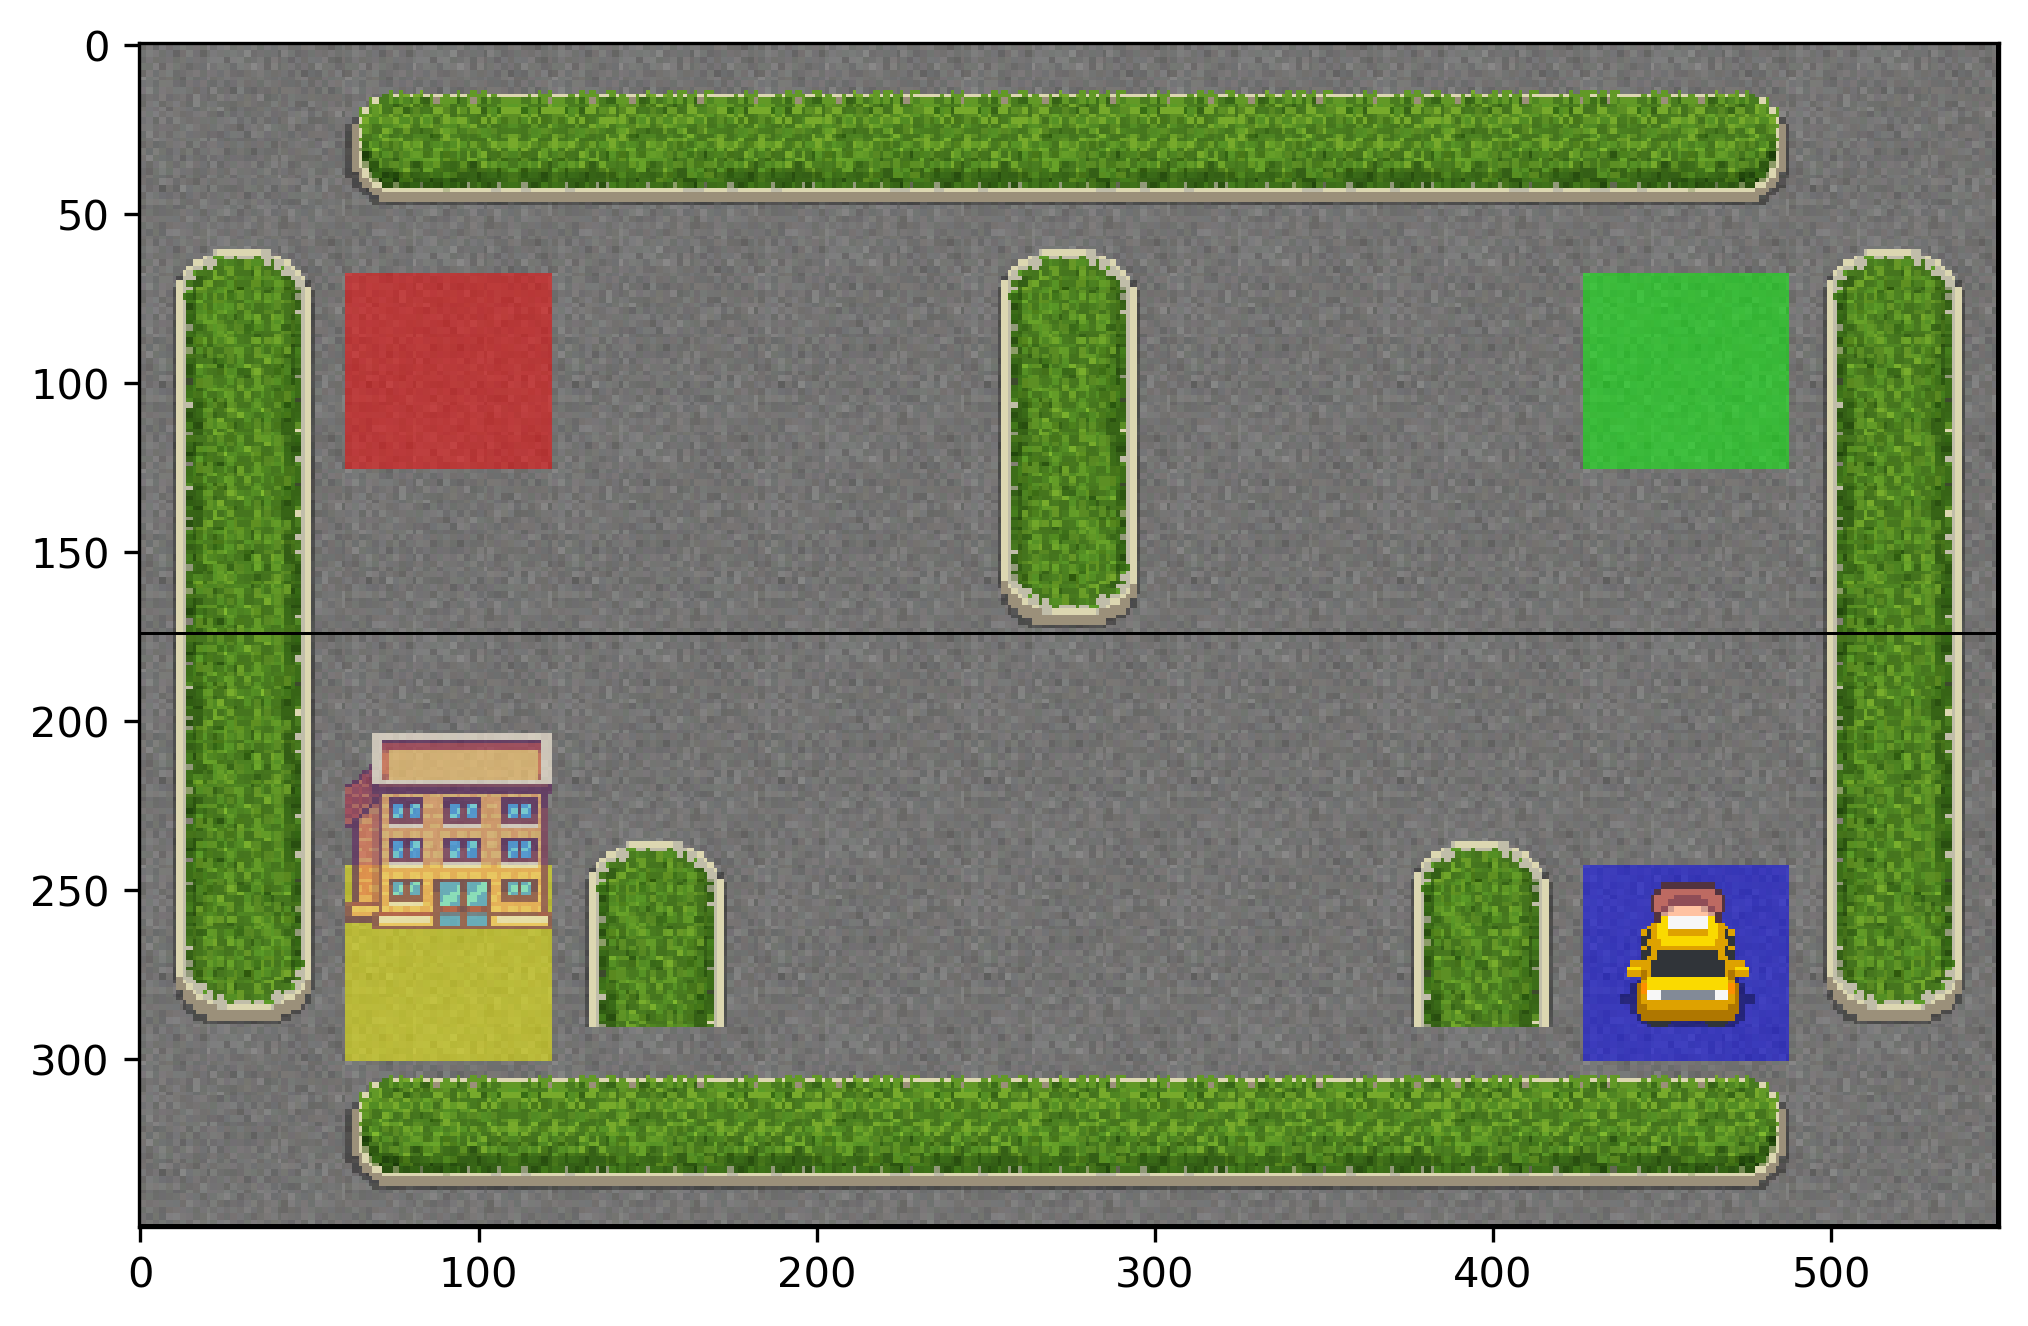

In [7]:
from matplotlib import pyplot as plt

env = gym.make('TaxiCustom', size=4, render_mode='rgb_array')
env.reset()
plt.imshow(env.render())


In [10]:
importlib.reload(utils)

if regenerate_runs_mdp:
    print('Value iteration: starting...')
    frozen_lake_df_vi, policies_vi = utils.write_stats_for_problem_sizes(
        algo_class=hiive.mdptoolbox.mdp.ValueIteration,
        main_size=MAIN_SIZE,
        state_sizes=sorted(list(GRID_SIZES.values())),
        problem_function=problem_foo,
        not_use_span_vi=True,
    )
    print('Value iteration: finished runs!')
    utils.save_df_as_csv(frozen_lake_df_vi, PATH_ARTEFACTS, VI_RUNS_CSV)
    utils.save_policies(policies_vi, PATH_ARTEFACTS, VI_POLICIES_JSON)
    print('Value iteration: saved!')

    print('Policy iteration: starting...')
    frozen_lake_df_pi, policies_pi = utils.write_stats_for_problem_sizes(
        algo_class=PolicyIterationCustom,
        main_size=MAIN_SIZE,
        state_sizes=sorted(list(GRID_SIZES.values())),
        problem_function=problem_foo,
        not_use_span_vi=False,
        collect_changes=True,
        max_iter=1e3,
    )
    print('Policy iteration: finished runs!')
    utils.save_df_as_csv(frozen_lake_df_pi, PATH_ARTEFACTS, PI_RUNS_CSV)
    utils.save_policies(policies_pi, PATH_ARTEFACTS, PI_POLICIES_JSON)
    print('Policy iteration: saved!')

Value iteration: starting...
4
4
4
4
4
4
Value iteration: finished runs!
Value iteration: saved!
Policy iteration: starting...
4
4
4
4
4
4
Policy iteration: finished runs!
Policy iteration: saved!


In [11]:
frozen_lake_df_vi = utils.read_csv(PATH_ARTEFACTS, VI_RUNS_CSV)
frozen_lake_policies_vi = utils.read_policies(PATH_ARTEFACTS, VI_POLICIES_JSON)
frozen_lake_df_pi = utils.read_csv(PATH_ARTEFACTS, PI_RUNS_CSV)
frozen_lake_policies_pi = utils.read_policies(PATH_ARTEFACTS, PI_POLICIES_JSON)

In [12]:
importlib.reload(plots)
plots.create_convergence_and_state_plots(8, frozen_lake_df_vi, folder_path=PATH_FIGURES, algo="vi",
                                         marker_size=5)
plots.create_convergence_and_state_plots(8, frozen_lake_df_pi, folder_path=PATH_FIGURES, algo="pi",
                                         marker_size=5, plot_changes=True)